<h1>First Midterm</h1>

Alessia De Ponti (599725) <br>
Assignment 7

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import latexify
import utils

<h3> Image Preprocessing <h3>

We begin by taking a greyscale image.

(516, 712)


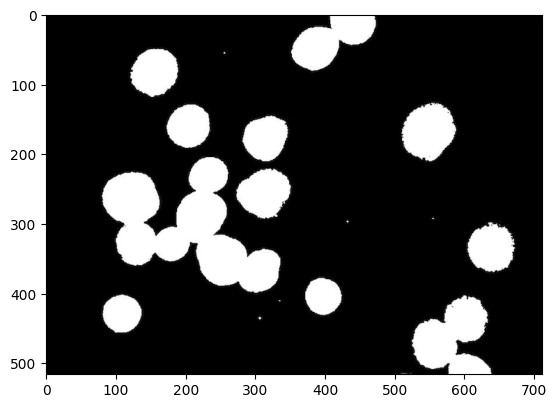

In [2]:
image = cv2.imread("../d.png", 0)
image = np.interp(image, (image.min(), image.max()), (-1, 1))   # Rescaling
plt.imshow(image, cmap='gray')
print(image.shape)

<h3> LoG Filter <h3>

We build a filter using the Laplacian of a Gaussian formula:

In [3]:
pi = np.pi
@latexify.function(use_math_symbols=True)
def LoG(x, y, sigma):
    return ((- 1 / (pi * sigma**4) ) * (1 - (x**2 + y**2) / (2 * sigma**2) ) ) * np.exp(-( (x**2 + y**2) / (2 * sigma**2)))

LoG

In order to build the kernel, the parameter sigma must be chosen (can be either a single value or an array). <br>
The kernel size is going to be $6\sigma$.

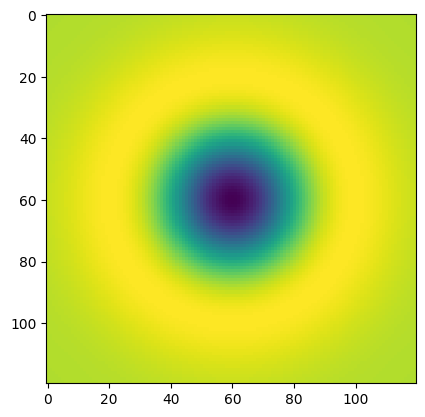

In [4]:
sigma = 20.
ker = utils.LoG_kern(sigma)
plt.imshow(ker)

<h3> Convolution <h3>

Using the filter just created, a convolution with the image is performed.   

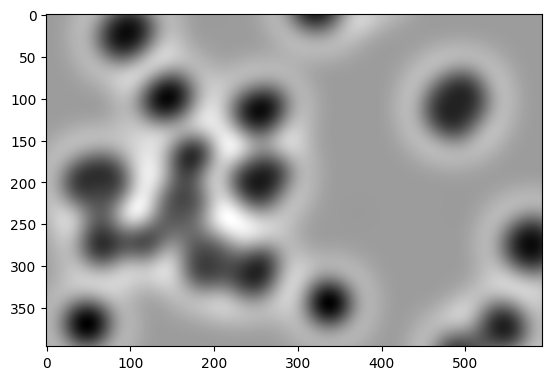

In [5]:
conv_image = utils.convolution(image, ker)
plt.imshow(conv_image, cmap='gray')

The image has become **blurred**, as expected. <br>
Furthermore the background has become **darker**: this happened because the center of the kernel is negative so, when performing convolution, high values (*white areas*) change sign (*become darker*). 

<h3> Blob Detection <h3>

The LoG filter has maximum response when centered on a circle of radius $\sqrt{2}\sigma$.<br>
Therefore, in order to find blobs, we see which regions have an higher response inside the circle.

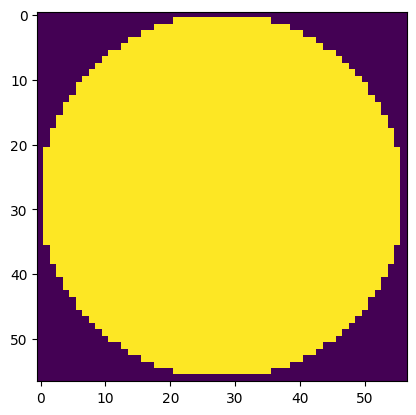

In [6]:
circle=utils.circle_mat(sigma)
plt.imshow(circle, interpolation='none')

In [7]:
centers = list(set(utils.detect_blob(conv_image, circle, sigma)))

0.007422044697670228
0.00796986050553429
0.008543204840958727
0.009141435661593759
0.009763684787030763
0.01040872529388105
0.011074975068135672
0.011760597997342472
0.012464272403943174
0.013182451848433398
0.013912071764190386
0.014649734762864946
0.015392993704451071
0.016137477188460318
0.016878109206198144
0.017613358173823986
0.018336704497013044
0.01904528605926565
0.019736667034268313
0.02040877394001637
0.021059972515638216
0.021693209336082576
0.022308497696242765
0.022907791138429775
0.02349556420881251
0.02407105135540748
0.024634198289504868
0.025192071900159877
0.025604829644272832
0.026015058603941977
0.026415696439107766
0.026807100833709886
0.027152519060604757
0.027439541419691866
0.02766327857245675
0.027819341217572756
0.02790338768103876
0.027911411964127067
0.027839494525654044
0.02768438535548124
0.02744222856097111
0.02710964252214384
0.02670500909913473
0.026255176800177443
0.025774241348574894
0.02523165728932059
0.02461866305432874
0.023967131107403904
0.0232

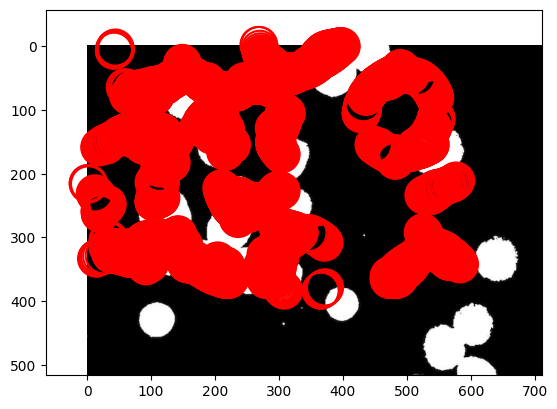

In [8]:
_, ax = plt.subplots()
ax.imshow(image, cmap="gray")
for blob in centers:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=1.5, fill=False)
        ax.add_patch(c)
ax.plot()  
plt.show()